# Classificazione binaria Decision tree finale
In questo notebook viene creato il modello decision tree finale. In particolare i parametri ottenuti tramite la ricerca gridSearch mostravano un leggero overfitting. A tal fine in questo notebook sono state testate per ogni criterio diverse profondità al fine di trovare quello con gap più contenuto(i risultati sono consultabili nella cartella results). Di conseguenza il criterio è rimasto invariato ma la pronfondità è stata abbassata a 5. Questa conseguenza deriva anche dai risultati ottenuti nel notebook 05_under_over.ipynb dove emerge che il modello overfitta a partire da profondità maggiori o uguali a 6. Quindi tramite la ricerca GridSearch prima con refit=accuracy e poi con refit=f1 la profondità suggerita era rispettvamente 10 e 7 il che ci portava ad avere un modello che overfittava.

In [1]:
import pandas as pd
import sys
sys.path.append('../Scripts')
from utility import evaluate_and_save_model,plot_roc_curve

X_train = pd.read_csv("../data/splitted/X_train.csv")
X_test = pd.read_csv("../data/splitted/X_test.csv")
y_train = pd.read_csv("../data/splitted/y_train.csv").values.ravel()
y_test = pd.read_csv("../data/splitted/y_test.csv").values.ravel()

In [2]:
from sklearn.tree import DecisionTreeClassifier
max = 5
cri = 'entropy'

model = DecisionTreeClassifier(criterion=cri, max_depth=max, random_state=42)

model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

evaluate_and_save_model(
    model,
    "decision tree selfmade final",
    y_train,
    y_pred_train,
    y_test,
    y_pred,
    "../results/classification_selfMade/decision_tree/gridsearch",
    "../models/decisiontree_selfmade_gridsearch_final.joblib",
    {"criterion": "entropy", "max_depth": 5}
)



In [4]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, max_depth=3, feature_names=X_train.columns, class_names=["False", "True"])
plt.savefig("../results/classification_selfMade/decision_tree/final_metrics/preview_gini.png")
plt.close()

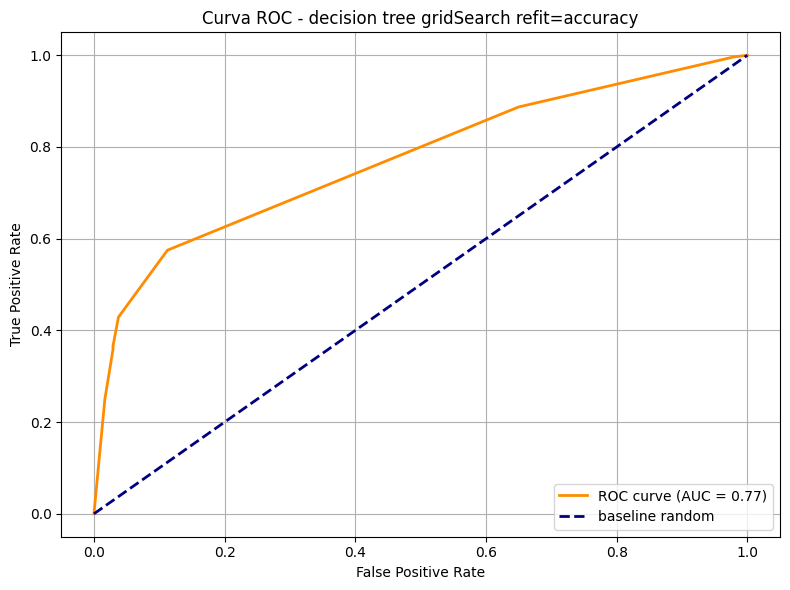

np.float64(0.7705714725816388)

In [5]:
plot_roc_curve(model, X_test, y_test, "decision tree gridSearch refit=accuracy",f"../results/classification_selfMade/roc")
